In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_excel('Enhanced_pizza_sell_data_2024-25.xlsx')


In [7]:
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
0,ORD001,Domino's,"New York, NY",2024-01-05 18:30:00,2024-01-05 18:45:00,15,Medium,Veg,3,2.5,...,1.200000,January,Online,6.0,9.0,False,6,2,18,30.259434
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14 20:00:00,2024-02-14 20:25:00,25,Large,Non-Veg,4,5.0,...,0.800000,February,Online,12.0,13.0,False,12,3,20,28.186275
2,ORD003,Little Caesars,"Chicago, IL",2024-03-21 12:15:00,2024-03-21 12:35:00,20,Small,Vegan,2,3.0,...,0.666667,March,Online,7.2,12.8,False,2,1,12,28.844221
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10 19:45:00,2024-04-10 20:10:00,25,XL,Cheese Burst,5,4.5,...,1.111111,April,Offline,10.8,14.2,False,20,2,19,29.948454
4,ORD005,Marco's Pizza,"Dallas, TX",2024-05-05 13:00:00,2024-05-05 13:20:00,20,Medium,Non-Veg,3,2.0,...,1.500000,May,Online,4.8,15.2,False,6,3,13,30.286458


In [8]:
df.tail()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
999,ORD1001,Domino's,"Albuquerque, NM",2026-07-03 19:00:00,2026-07-03 19:30:00,30,Large,Sicilian,4,5.5,...,0.727273,July,Online,13.2,16.8,False,12,2,19,30.259434
1000,ORD1002,Pizza Hut,"Atlanta, GA",2026-07-04 20:15:00,2026-07-04 20:45:00,30,Medium,Veg,2,4.0,...,0.500000,July,Online,9.6,20.4,False,4,1,20,29.948454
1001,ORD1003,Papa John's,"Omaha, NE",2026-07-05 18:30:00,2026-07-05 19:00:00,30,Medium,BBQ Chicken,3,5.0,...,0.600000,July,Online,12.0,18.0,False,6,2,18,28.186275
1002,ORD1004,Little Caesars,"Louisville, KY",2026-07-06 19:45:00,2026-07-06 20:15:00,30,XL,Cheese Burst,5,6.0,...,0.833333,July,Online,14.4,15.6,False,20,3,19,28.844221
1003,ORD1005,Marco's Pizza,"Milwaukee, WI",2026-07-07 20:00:00,2026-07-07 20:30:00,30,Medium,Margarita,3,4.5,...,0.666667,July,Online,10.8,19.2,False,6,2,20,30.286458


In [6]:
df['Order Time'] = pd.to_datetime(df['Order Time'])
df['Delivery Time'] = pd.to_datetime(df['Delivery Time'])


In [9]:
df['Order Day'] = df['Order Time'].dt.day_name()
df['Order Hour'] = df['Order Time'].dt.hour
df['Order Month'] = df['Order Time'].dt.month_name()


In [10]:
print('Dataset Shape:', df.shape)
print('\nDataset Info:')
df.info()

Dataset Shape: (1004, 26)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Order ID                      1004 non-null   object        
 1   Restaurant Name               1004 non-null   object        
 2   Location                      1004 non-null   object        
 3   Order Time                    1004 non-null   datetime64[ns]
 4   Delivery Time                 1004 non-null   datetime64[ns]
 5   Delivery Duration (min)       1004 non-null   int64         
 6   Pizza Size                    1004 non-null   object        
 7   Pizza Type                    1004 non-null   object        
 8   Toppings Count                1004 non-null   int64         
 9   Distance (km)                 1004 non-null   float64       
 10  Traffic Level                 1004 non-null   object   

In [ ]:
print('\nSummary statistics for numeric columns:')
display(df.describe())


Summary statistics for numeric columns:


,Order Time,Delivery Time,Delivery Duration (min),Toppings Count,Distance (km),Delivery Efficiency (min/km),Topping Density,Estimated Duration (min),Delay (min),Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
count,1004,1004,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,2025-03-27 00:33:24.980079872,2025-03-27 01:02:54.501992192,29.492032,3.362550,4.945618,6.397006,0.714684,11.869482,17.622550,9.468127,2.049801,18.691235,29.492032
min,2024-01-05 18:30:00,2024-01-05 18:45:00,15.000000,1.000000,2.000000,4.166667,0.266667,4.800000,9.000000,1.000000,1.000000,12.000000,26.666667
25%,2024-08-31 13:33:45,2024-08-31 14:05:00,25.000000,3.000000,3.500000,5.000000,0.600000,8.400000,15.200000,6.000000,1.000000,18.000000,28.844221
50%,2025-03-01 07:30:00,2025-03-01 08:12:30,30.000000,3.000000,4.500000,6.000000,0.666667,10.800000,17.800000,6.000000,2.000000,19.000000,29.948454
75%,2025-11-07 00:48:45,2025-11-07 01:18:45,30.000000,4.000000,6.000000,7.142857,0.833333,14.400000,20.400000,12.000000,3.000000,20.000000,30.259434
max,2026-07-07 20:00:00,2026-07-07 20:30:00,50.000000,5.000000,10.000000,12.500000,1.500000,24.000000,30.080000,20.000000,3.000000,21.000000,30.286458
std,NaN,NaN,7.753103,1.135853,1.951463,1.562573,0.203020,4.683510,3.964289,6.233731,0.775696,1.529466,0.859941


In [13]:
plt.figure(figsize=(15, 20))

<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x2000 with 0 Axes>

Text(0.5, 1.0, 'Delivery Duration by Pizza Size')

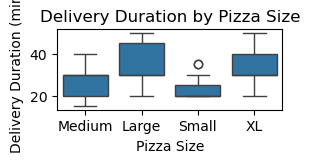

In [14]:
plt.subplot(4, 2, 1)
sns.boxplot(x='Pizza Size', y='Delivery Duration (min)', data=df)
plt.title('Delivery Duration by Pizza Size')

Text(0.5, 1.0, 'Average Delay by Traffic Level')

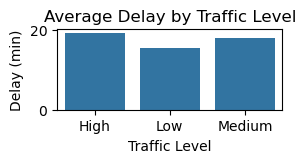

In [15]:
plt.subplot(4, 2, 2)
traffic_impact = df.groupby('Traffic Level')['Delay (min)'].mean().reset_index()
sns.barplot(x='Traffic Level', y='Delay (min)', data=traffic_impact)
plt.title('Average Delay by Traffic Level')

Text(0.5, 1.0, 'Payment Method Distribution')

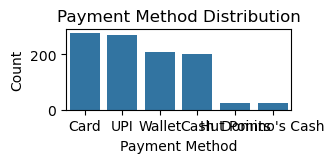

In [16]:
plt.subplot(4, 2, 3)
payment_counts = df['Payment Method'].value_counts().reset_index()
payment_counts.columns = ['Payment Method', 'Count']
sns.barplot(x='Payment Method', y='Count', data=payment_counts)
plt.title('Payment Method Distribution')


Text(0.5, 1.0, 'Order Volume by Hour of Day')

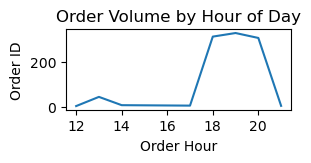

In [17]:
plt.subplot(4, 2, 4)
peak_hour = df.groupby('Order Hour')['Order ID'].count().reset_index()
sns.lineplot(x='Order Hour', y='Order ID', data=peak_hour)
plt.title('Order Volume by Hour of Day')


Text(0.5, 1.0, 'Delivery Duration: Weekend vs Weekday')

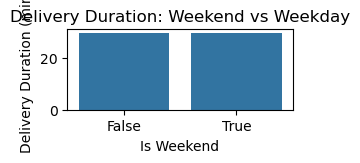

In [18]:
plt.subplot(4, 2, 5)
weekend_analysis = df.groupby('Is Weekend')['Delivery Duration (min)'].mean().reset_index()
sns.barplot(x='Is Weekend', y='Delivery Duration (min)', data=weekend_analysis)
plt.title('Delivery Duration: Weekend vs Weekday')


Text(0.5, 1.0, 'Pizza Type Popularity')

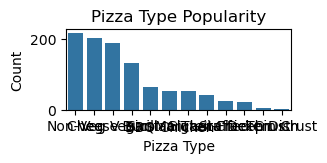

In [19]:
plt.subplot(4, 2, 6)
pizza_type = df['Pizza Type'].value_counts().reset_index()
pizza_type.columns = ['Pizza Type', 'Count']
sns.barplot(x='Pizza Type', y='Count', data=pizza_type)
plt.title('Pizza Type Popularity')


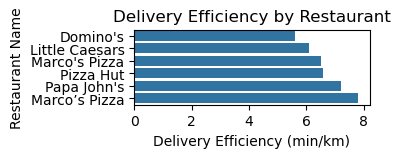

In [21]:
plt.subplot(4, 2, 7)
efficiency = df.groupby('Restaurant Name')['Delivery Efficiency (min/km)'].mean().sort_values().reset_index()
sns.barplot(x='Delivery Efficiency (min/km)', y='Restaurant Name', data=efficiency)
plt.title('Delivery Efficiency by Restaurant')

plt.tight_layout()
plt.show()



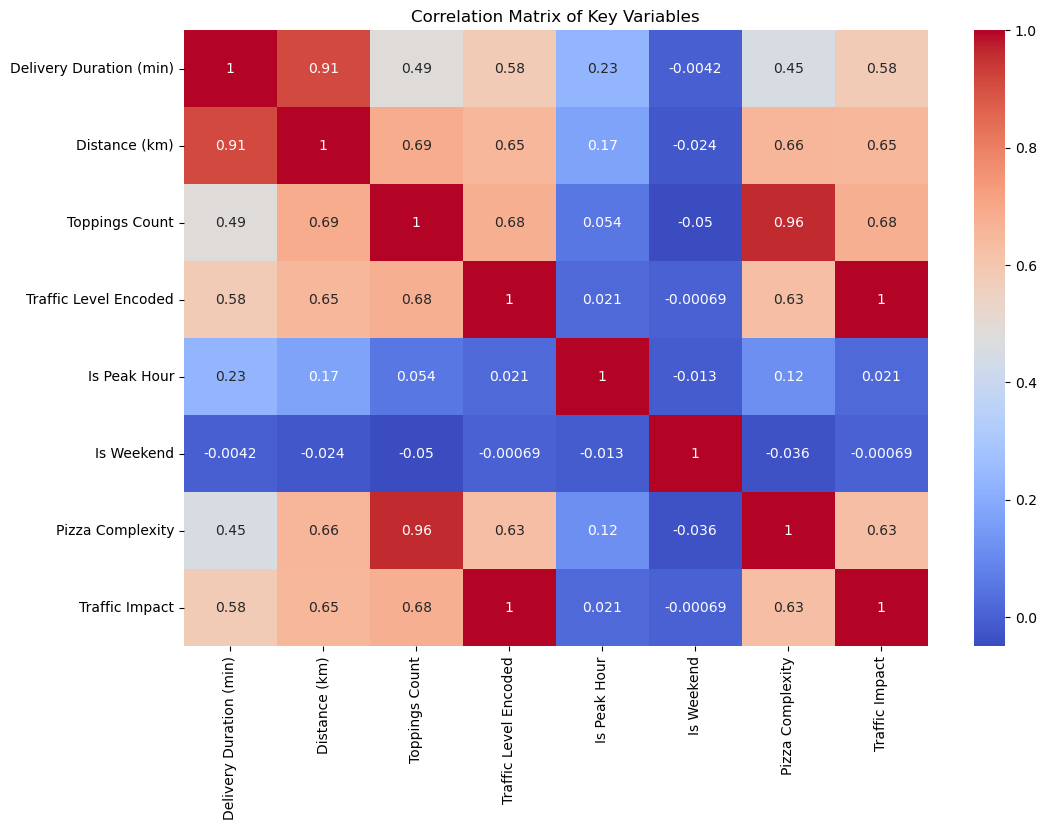

In [23]:
plt.figure(figsize=(12, 8))

# Encode 'Traffic Level' as numeric values
df['Traffic Level Encoded'] = df['Traffic Level'].map({'Low': 1, 'Medium': 2, 'High': 3})

# Calculate the correlation matrix
corr_matrix = df[['Delivery Duration (min)', 'Distance (km)', 'Toppings Count', 
                 'Traffic Level Encoded', 'Is Peak Hour', 'Is Weekend', 'Pizza Complexity', 
                 'Traffic Impact']].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Variables')
plt.show()


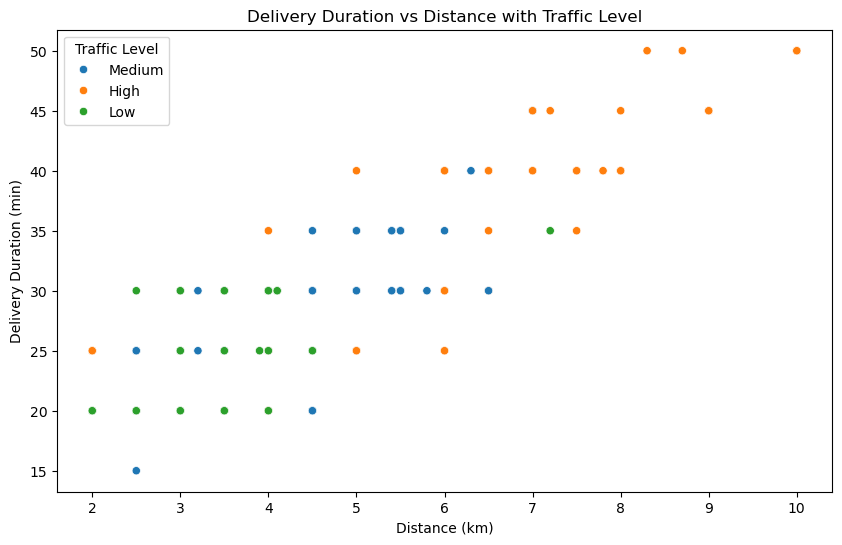

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance (km)', y='Delivery Duration (min)', hue='Traffic Level', data=df)
plt.title('Delivery Duration vs Distance with Traffic Level')
plt.show()


In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [26]:
features = ['Distance (km)', 'Toppings Count', 'Traffic Level', 'Is Peak Hour', 
            'Is Weekend', 'Pizza Complexity', 'Traffic Impact', 'Pizza Size']
X = df[features]
y = df['Delivery Duration (min)']


In [27]:
X = pd.get_dummies(X, columns=['Traffic Level', 'Pizza Size'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Absolute Error: {mae:.2f} minutes")
print(f"R-squared: {r2:.2f}")



Model Performance:
Mean Absolute Error: 0.56 minutes
R-squared: 0.97


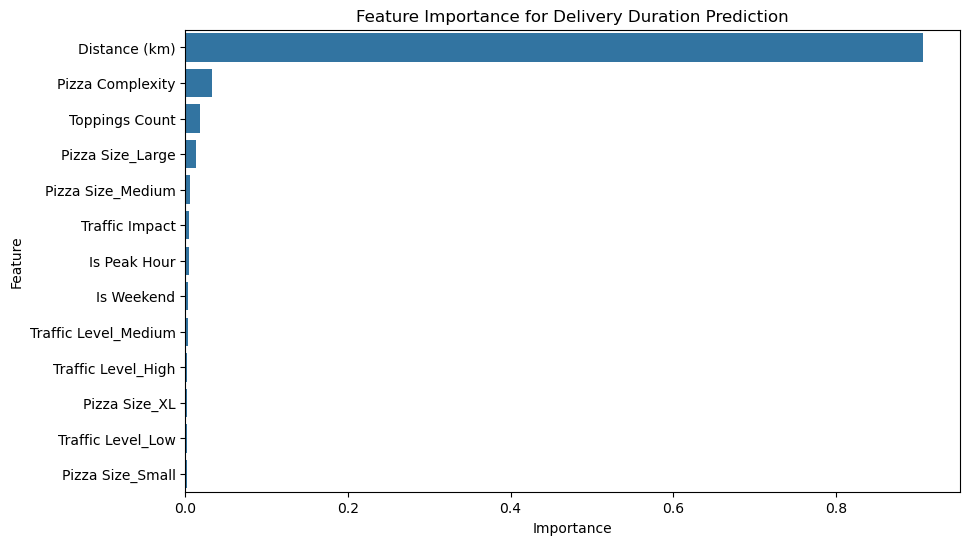

In [29]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Delivery Duration Prediction')
plt.show()


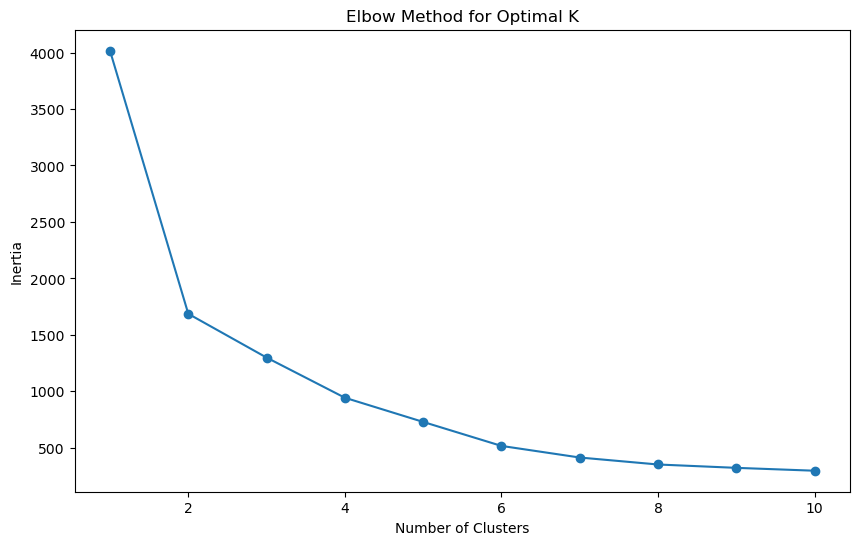

In [31]:
from sklearn.preprocessing import StandardScaler

# Select numeric features for scaling
numeric_features = ['Distance (km)', 'Toppings Count', 'Pizza Complexity', 'Traffic Impact']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numeric_features])

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [33]:
# Business Recommendations

# 1. Peak hour analysis
peak_hours = df.groupby('Order Hour')['Order ID'].count().sort_values(ascending=False)
print("\nTop 5 Busiest Hours:")
print(peak_hours.head(5))

# 2. Restaurant performance
# Calculate Efficiency Ratio if not already present
if 'Efficiency Ratio' not in df.columns:
    df['Efficiency Ratio'] = df['Delivery Duration (min)'] / df['Distance (km)']

restaurant_perf = df.groupby('Restaurant Name').agg({
    'Delivery Duration (min)': 'mean',
    'Efficiency Ratio': 'mean',
    'Order ID': 'count'
}).sort_values('Efficiency Ratio', ascending=False)
print("\nRestaurant Performance:")
print(restaurant_perf)

# 3. Pizza type profitability
pizza_profitability = df.groupby('Pizza Type').agg({
    'Delivery Duration (min)': 'mean',
    'Toppings Count': 'mean',
    'Order ID': 'count'
}).sort_values('Order ID', ascending=False)
print("\nPizza Type Popularity and Characteristics:")
print(pizza_profitability)

# 4. Delivery delay analysis
delayed_orders = df[df['Is Delayed']]
delay_reasons = delayed_orders.groupby(['Traffic Level', 'Is Peak Hour']).size().unstack()
print("\nDelay Reasons Analysis:")
print(delay_reasons)


Top 5 Busiest Hours:
Order Hour
19    328
18    312
20    306
13     43
14      6
Name: Order ID, dtype: int64

Restaurant Performance:
                 Delivery Duration (min)  Efficiency Ratio  Order ID
Restaurant Name                                                     
Marco’s Pizza                  26.666667          7.812500         3
Papa John's                    28.186275          7.223012       204
Pizza Hut                      29.948454          6.583230       194
Marco's Pizza                  30.286458          6.503142       192
Little Caesars                 28.844221          6.084472       199
Domino's                       30.259434          5.608975       212

Pizza Type Popularity and Characteristics:
               Delivery Duration (min)  Toppings Count  Order ID
Pizza Type                                                      
Non-Veg                      29.976852        3.421296       216
Veg                          28.762376        2.846535       202
Cheese 